In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Bootstrap (Sendiri)

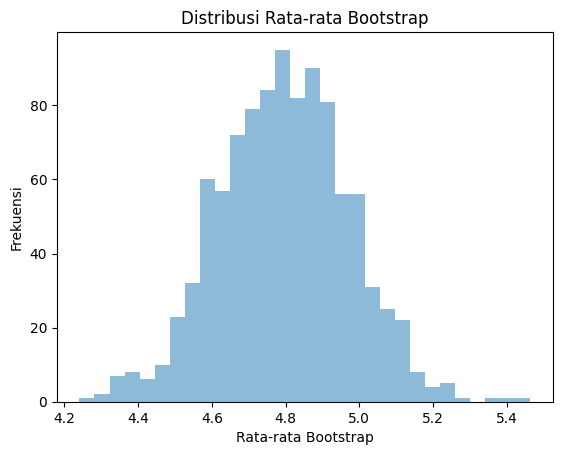

In [48]:
np.random.seed(42)
data = np.random.normal(loc=5.0, scale=2.0, size=100)

def bootstrap_mean(data, num_samples=1000):
    sample_means = []
    n = len(data)
    for _ in range(num_samples):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        sample_mean = np.mean(bootstrap_sample)
        sample_means.append(sample_mean)
    return sample_means

bootstrap_samples = bootstrap_mean(data)


plt.hist(bootstrap_samples, bins=30, alpha=0.5)
plt.title('Distribusi Rata-rata Bootstrap')
plt.xlabel('Rata-rata Bootstrap')
plt.ylabel('Frekuensi')
plt.show()


In [15]:
np.mean (bootstrap_means)

50.343405990210364

# Jackknife (Sendiri)

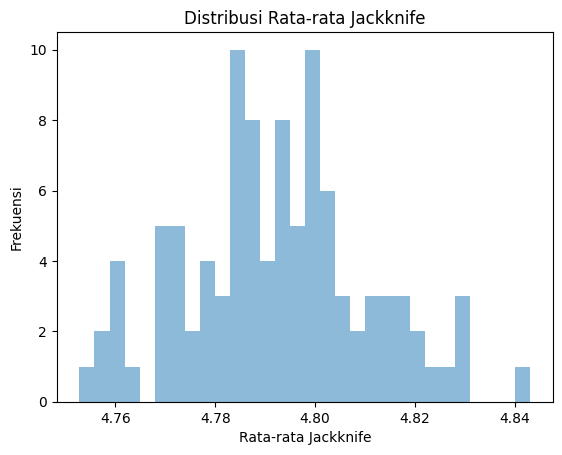

In [58]:
def jackknife_mean(data):
    n = len(data)
    sample_means = []
    for i in range(n):
        jackknife_sample = np.delete(data, i)
        sample_mean = np.mean(jackknife_sample)
        sample_means.append(sample_mean)
    return sample_means

jackknife_samples = jackknife_mean(data)

plt.hist(jackknife_samples, bins=30, alpha=0.5)
plt.title('Distribusi Rata-rata Jackknife')
plt.xlabel('Rata-rata Jackknife')
plt.ylabel('Frekuensi')
plt.show()


In [59]:
np.mean (jackknife_samples)

4.792306965211813

# Bootstrap (Pak Ahsan)

In [63]:
def bootstrap_mean(data, num_samples):
    bootstrap_means = []
    for i in range(num_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True) 
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means.append(bootstrap_mean)
        
    return bootstrap_means

In [66]:
data = np.random.normal(loc=50, scale=10, size=1000)
num_samples = 1000
bootstrap_means = bootstrap_mean(data, num_samples) 
np.mean (bootstrap_means)

50.18643381993291

In [67]:
def bootstrap_std(data, n_samples): 
    hasil_std_bootstrap = [] 
    for i in range(n_samples): 
        bootstrap_samples = np.random.choice(data, size=len(data), replace=True) 
        bootstrap_std = np.std(bootstrap_samples)
        hasil_std_bootstrap.append(bootstrap_std)
    
    hasil_std_bootstrap = np.mean(hasil_std_bootstrap)
    return hasil_std_bootstrap

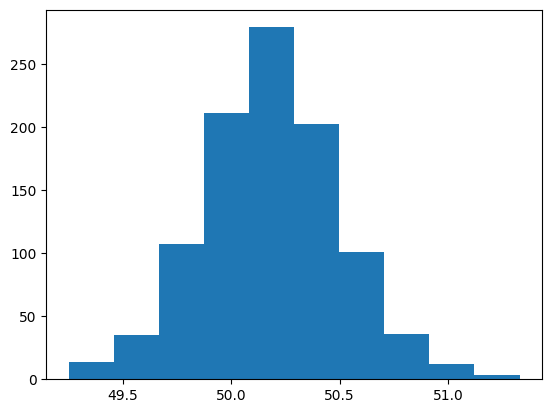

In [68]:
plt.hist(bootstrap_means, bins=10)
plt.show()

In [69]:
percentiles = np.percentile(bootstrap_means, [2.5, 97.5])
lower_bound = percentiles[0]
upper_bound = percentiles[1]

In [70]:
def bootstrap_proportion(data, num_samples):
    bootstrap_proportions = []
    for i in range(num_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        proportion = sum(bootstrap_sample > 50) / len(bootstrap_sample)  # misalnya, proporsi nilai di atas 50
        bootstrap_proportions.append(proportion)
        
    return bootstrap_proportions

data = np.random.normal(loc=50, scale=10, size=1000)
num_samples = 1000
bootstrap_proportions = bootstrap_proportion(data, num_samples)
np.std(bootstrap_proportions)


0.015892489767182494

In [71]:
percentiles = np.percentile(bootstrap_means, [2.5, 97.5])
lower_bound = percentiles[0]
upper_bound = percentiles [1]
print("95% confidence interval for the mean:", lower_bound, upper_bound)

95% confidence interval for the mean: 49.5728212166279 50.82199192725136


# Jackknife (Pak Ahsan)

In [72]:
def jackknife_mean(data):
    n = len(data)
    mean_estimates = np.zeros(n)
    for i in range(n):
        jackknife_sample = np.delete(data, i)
        mean_estimates[i] = np.mean(jackknife_sample)
    return np.mean(mean_estimates), mean_estimates

In [73]:
jackknife_mean(data)[0]

50.04726521994158

In [74]:
percentiles = np.percentile(jackknife_mean(data)[1], [2.5, 97.5])
lower_bound = percentiles[0]
upper_bound = percentiles [1]
print("95% confidence interval for the mean:", lower_bound, upper_bound)

95% confidence interval for the mean: 50.02723218834786 50.06736057498411


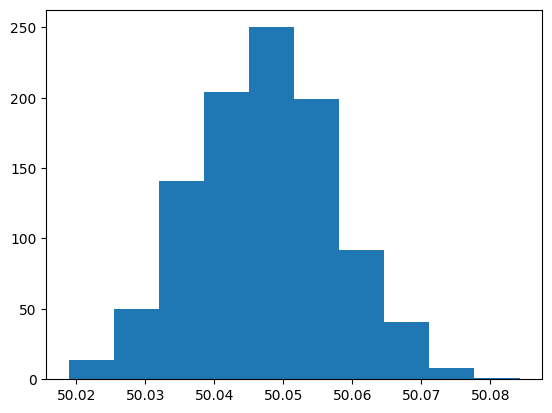

In [75]:
plt.hist(jackknife_mean(data)[1], bins=10)
plt.show()

In [125]:
import numpy as np
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [7, 11, 9]])
y = np.array([3, 5, 7, 4])

In [126]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
model.coef_

array([ 0.83333333, -1.        ,  0.83333333])

In [139]:
X_bootstrap = X[np.random.choice(X.shape[0], X.shape[0], replace=True)] 
#X_bootstrap = X[np.random.choice(4, 20, replace=True)]
X_bootstrap

array([[1, 2, 3],
       [1, 2, 3],
       [4, 5, 6],
       [1, 2, 3]])

In [140]:
y_bootstrap = y[np.random.choice(y.shape[0], y.shape[0], replace=True)]
y_bootstrap

array([4, 7, 7, 5])

In [141]:
model = LinearRegression()
model.fit(X_bootstrap, y_bootstrap)
model.coef_

array([0.18518519, 0.18518519, 0.18518519])

In [142]:
def bootstrap_coefficients (X, y, n_bootstraps):
    coefs = []
    for i in range(n_bootstraps):
        # Resample the data with replacement
        X_bootstrap = X[np.random.choice(X.shape[0], X.shape[0], replace=True)] 
        y_bootstrap = y[np.random.choice(y.shape[0], y.shape[0], replace=True)]
        
        # Fit the Linear regression model
        model = LinearRegression()
        model.fit(X_bootstrap, y_bootstrap)
        # Append the coefficients to the List
        coefs.append(model.coef_)

    # Calculate the mean and standard deviation of the coefficients
    coef_mean = np.mean(coefs, axis=0)
    
    return coef_mean, coefs

In [143]:
coef_mean, coefs = bootstrap_coefficients(X, y, n_bootstraps=1000) 
bias = coef_mean-model.coef_
print("True Coefficient mean:", model.coef_)
print("Estimated Coefficient mean:", coef_mean)
print("Bias:", bias)

True Coefficient mean: [0.18518519 0.18518519 0.18518519]
Estimated Coefficient mean: [ 0.02130699 -0.02657318  0.02130699]
Bias: [-0.16387819 -0.21175837 -0.16387819]


In [144]:
data = np.array([[1, 2, 3, 3], [4, 5, 6, 5], [7, 8, 9, 7], [7, 11, 9, 4]]) 
data

array([[ 1,  2,  3,  3],
       [ 4,  5,  6,  5],
       [ 7,  8,  9,  7],
       [ 7, 11,  9,  4]])

In [145]:
X = data[:, :-1]
y = data[:, -1]
y

array([3, 5, 7, 4])

In [152]:
data_boot = data[np.random.choice(data.shape[0], data.shape[0], replace=True)]
data_boot

array([[4, 5, 6, 5],
       [1, 2, 3, 3],
       [4, 5, 6, 5],
       [4, 5, 6, 5]])

In [153]:
model = LinearRegression()
model.fit(X, y)
model.coef_

array([ 0.83333333, -1.        ,  0.83333333])

In [158]:
def boot_coefficients(data, n_bootstraps):
    coefs = []
    for i in range(n_bootstraps):
        #Resample the data with replacement
        data_boot = data[np.random.choice(data.shape[0], data.shape[0], replace=True)]
        X_boot = data_boot[:, :-1] 
        y_boot = data_boot[:, -1]
        
        # Fit the Linear regression model
        model = LinearRegression() 
        model.fit(X_boot, y_boot)
        
        # Append the coefficients to the list
        coefs.append(model.coef_)
    
    # Calculate the mean and standard deviation of the coefficients
    coef_mean = np.mean(coefs, axis=0)
    return coef_mean, coefs

In [160]:
coef_mean, coefs = boot_coefficients(data_boot, n_bootstraps=1000) 
bias = coef_mean-model.coef_ 
print("True Coefficient mean:", model.coef_) 
print("Estimated Coefficiexnt mean:", coef_mean) 
print("Bias:", bias)

True Coefficient mean: [ 0.83333333 -1.          0.83333333]
Estimated Coefficiexnt mean: [0.15377778 0.15377778 0.15377778]
Bias: [-0.67955556  1.15377778 -0.67955556]
